In [1]:
import SimpleITK as sitk 
import numpy as np 
import matplotlib.pyplot as plt 
from library_dicom.dicom_processor.tools.preprocessing import *
import json 
import csv 
from sklearn.model_selection import train_test_split 
import tensorflow as tf 
from classification.Prep_CSV import Prep_CSV
from classification.Preprocessing import Preprocessing 
from classification.resnet50 import *

In [2]:
json_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/result.json'
nifti_directory = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92'
objet = Prep_CSV(json_path)
objet.result_csv(nifti_directory)
print(objet.csv_result_path)

prep_objet = Preprocessing(objet.csv_result_path)
X, y = prep_objet.normalize_encoding_dataset()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.15) #random state 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 42, test_size = 0.15)
print("size of X_train : ", X_train.shape)
print("size of y_train : ",y_train.shape)
print("")
print("size of X_test : ", X_test.shape)
print("size of y_test : ",y_test.shape)
print("")
print("size of X_val : ", X_val.shape)
print("size of y_val : ",y_val.shape)


/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/classif_test_png.csv
size of X_train :  (440, 503, 136, 1)
size of y_train :  (440, 4)

size of X_test :  (92, 503, 136, 1)
size of y_test :  (92, 4)

size of X_val :  (78, 503, 136, 1)
size of y_val :  (78, 4)


In [109]:
type(y)

numpy.ndarray

(1024, 256, 1)


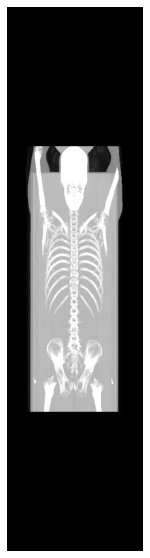

In [110]:
import matplotlib.pyplot as plt 
print(X_train[0].shape)
f = plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

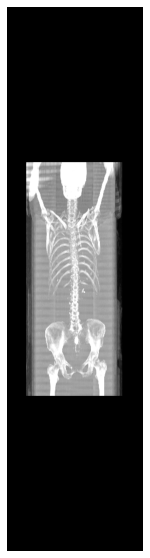

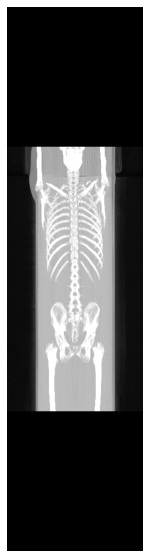

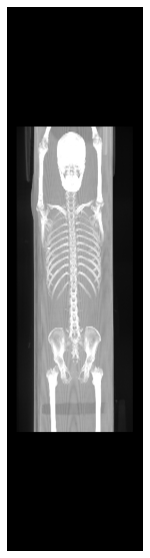

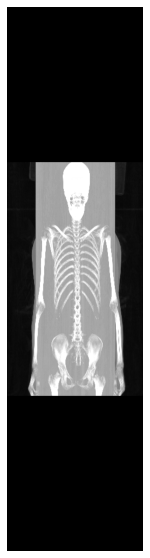

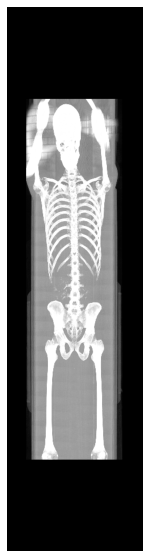

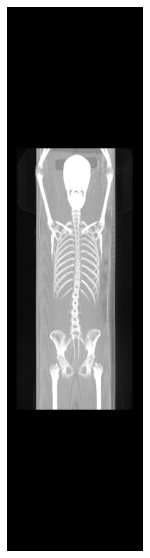

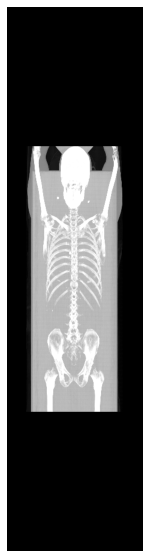

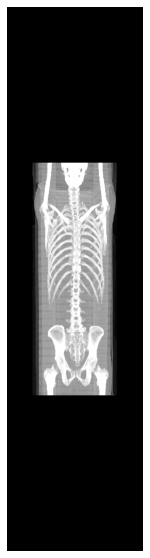

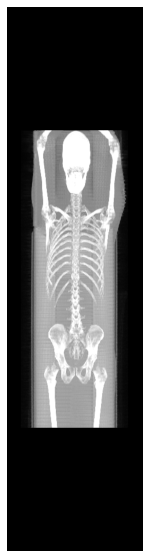

In [111]:
for i in range(6, 15):
    f = plt.figure(figsize=(10,10))
    axes = plt.gca()
    axes.set_axis_off()
    plt.imshow(X_train[i][:,:,0], cmap = 'gray')
    plt.show()
    

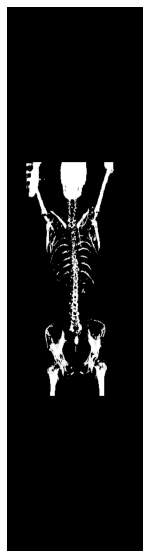

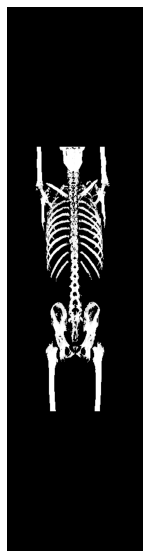

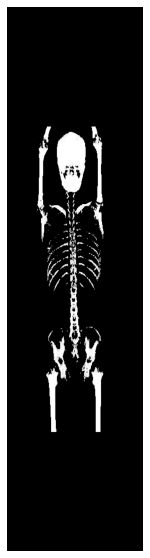

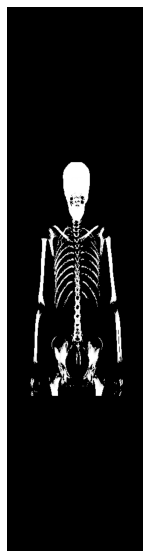

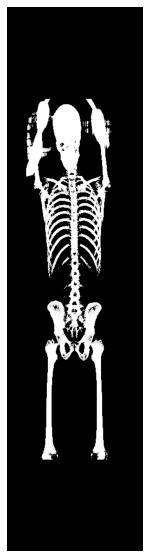

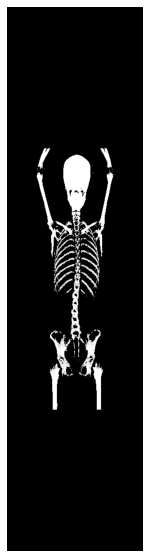

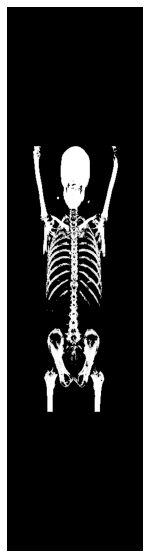

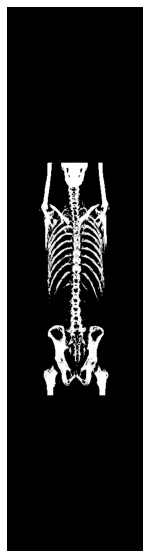

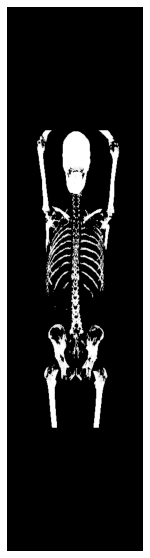

In [112]:
for i in range(6, 15):
    f = plt.figure(figsize=(10,10))
    axes = plt.gca()
    axes.set_axis_off()
    X_train[i][:,:,0][np.where(X_train[i][:,:,0] < 0.85)] = 0
    plt.imshow(X_train[i][:,:,0], cmap='gray')
    plt.show()


In [124]:
#nifti 

ct_path = '/media/deeplearning/Elements/classif_ct/nifti/nifti_ahl/1.2.124.113532.10.149.172.5.20131107.93455.7725981_mip_ct_nifti_.nii'

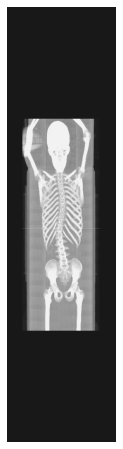

In [126]:
import SimpleITK as sitk 

img = sitk.ReadImage(ct_path)
array = sitk.GetArrayFromImage(img)
f = plt.figure(figsize=(5,8))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(array, cmap = 'gray')
plt.show()

In [127]:
array.shape

(1024, 256)

In [178]:
import os 
png_dir = os.listdir('/media/deeplearning/Elements/classif_ct/image_a_annoter/ahl')

In [179]:
for i in range(len(png_dir)) : 
    png_dir[i] = os.path.join('/media/deeplearning/Elements/classif_ct/image_a_annoter/ahl', png_dir[i])

In [180]:
len(png_dir)

574

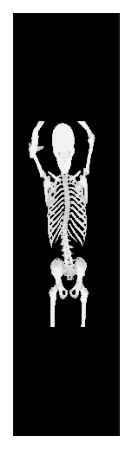

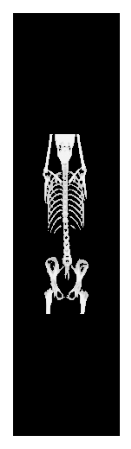

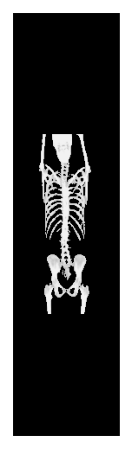

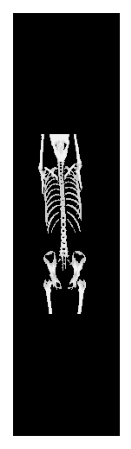

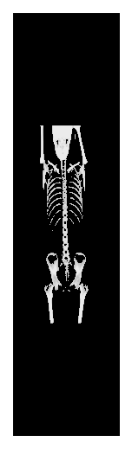

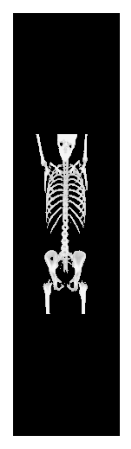

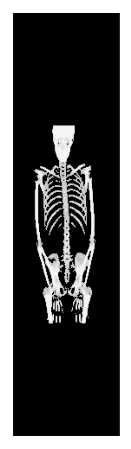

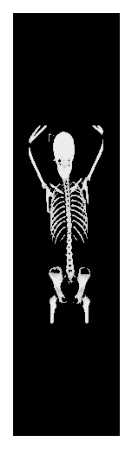

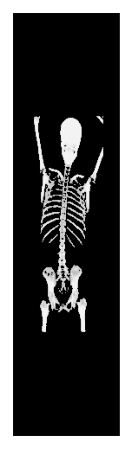

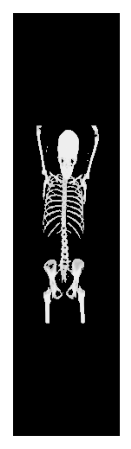

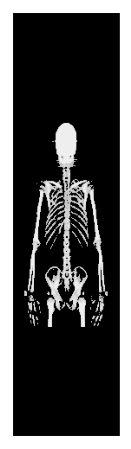

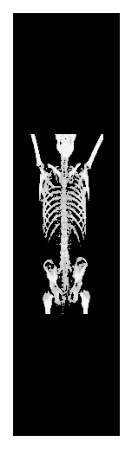

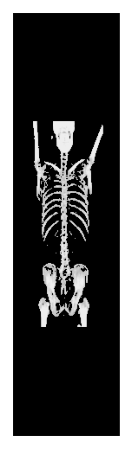

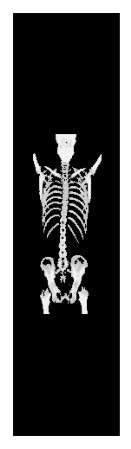

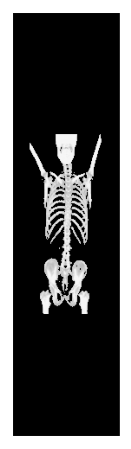

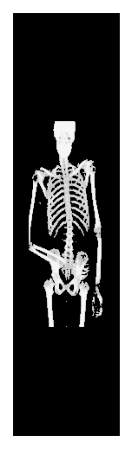

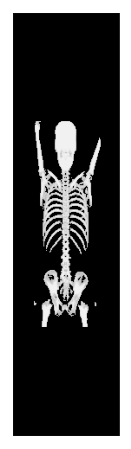

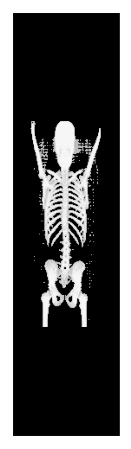

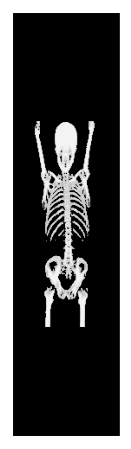

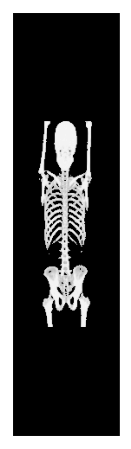

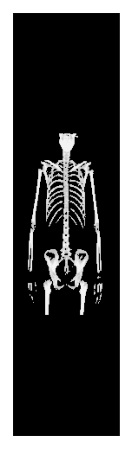

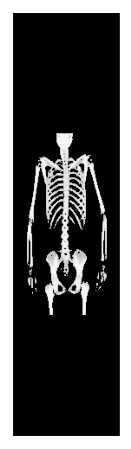

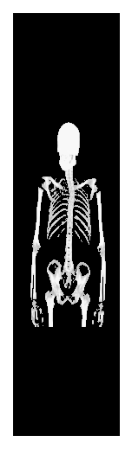

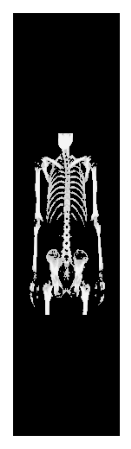

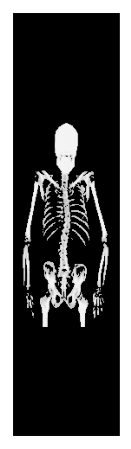

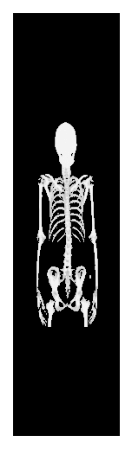

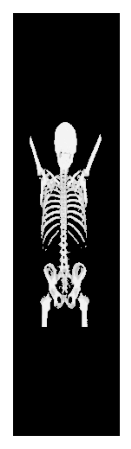

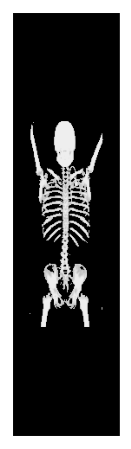

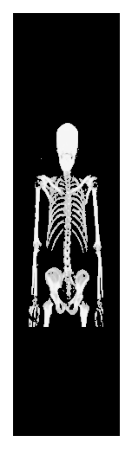

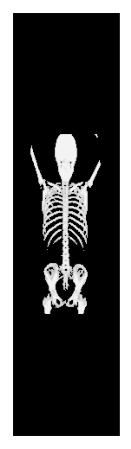

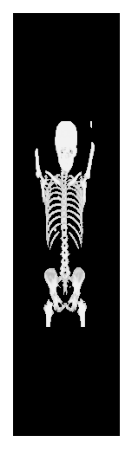

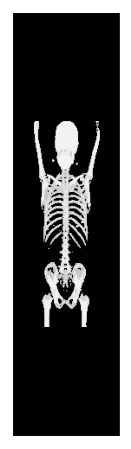

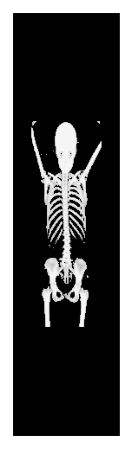

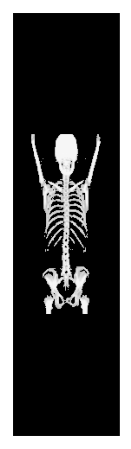

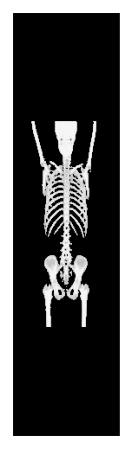

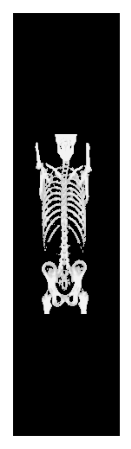

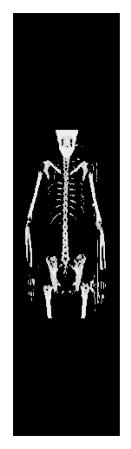

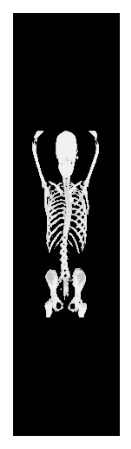

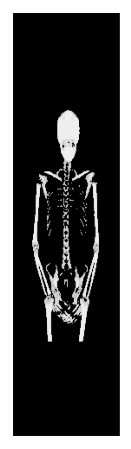

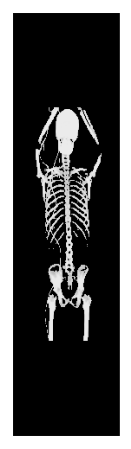

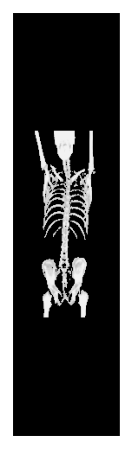

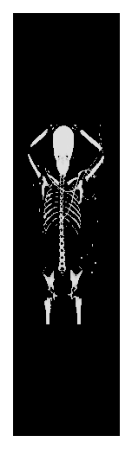

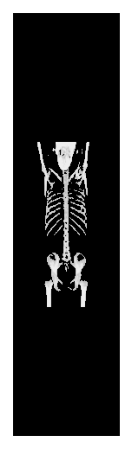

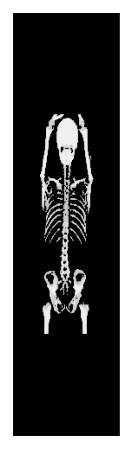

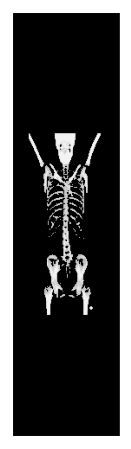

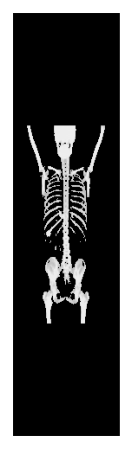

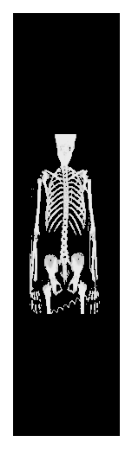

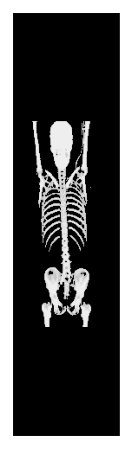

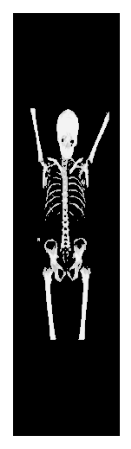

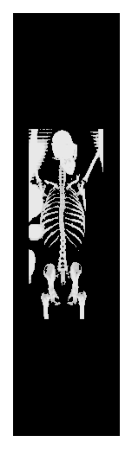

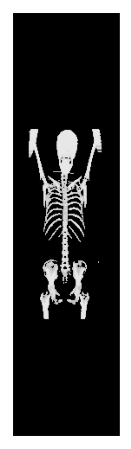

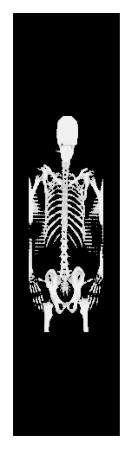

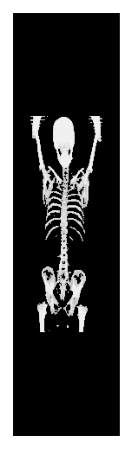

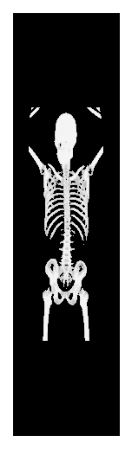

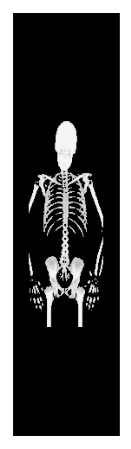

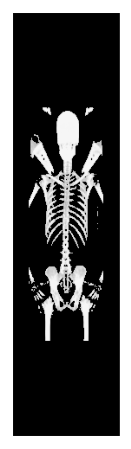

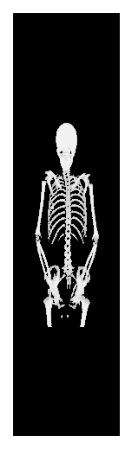

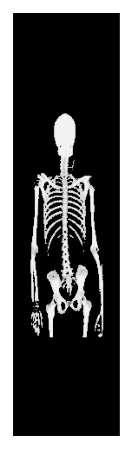

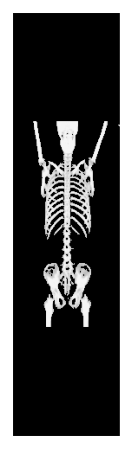

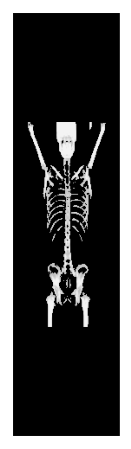

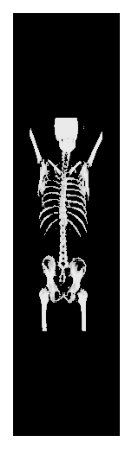

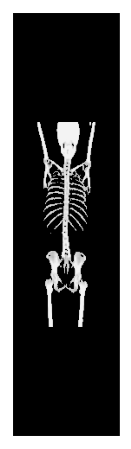

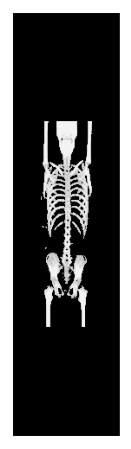

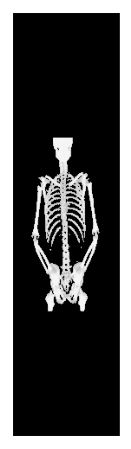

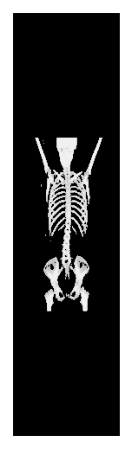

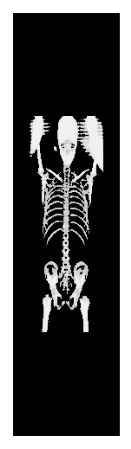

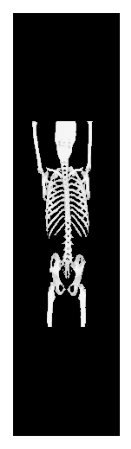

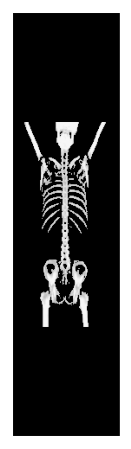

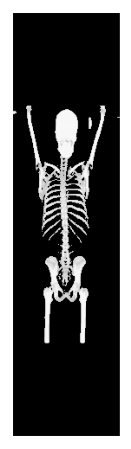

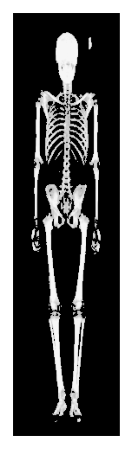

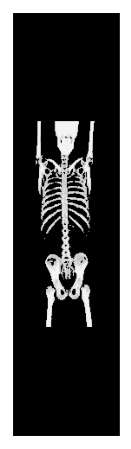

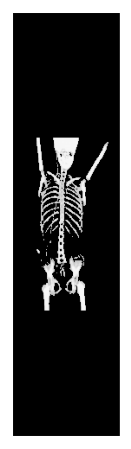

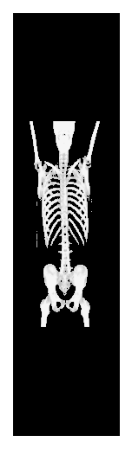

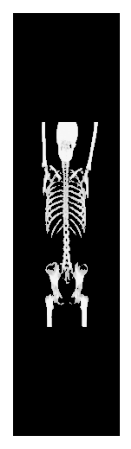

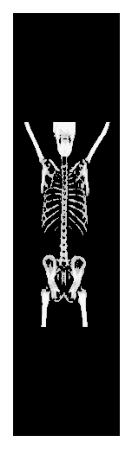

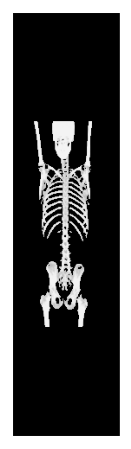

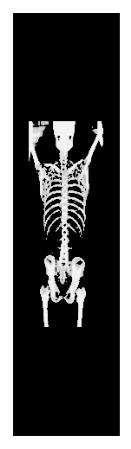

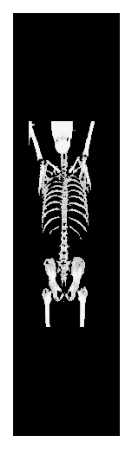

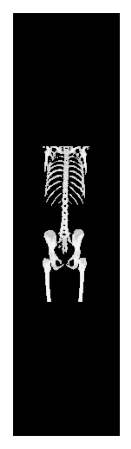

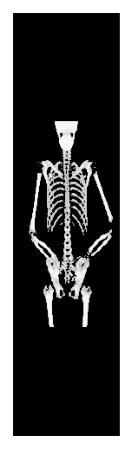

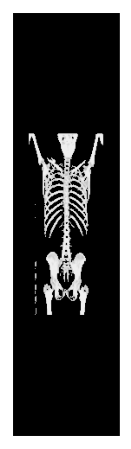

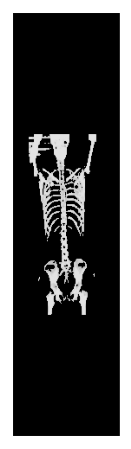

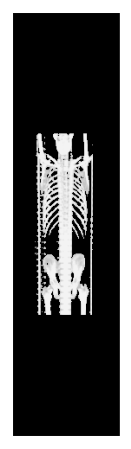

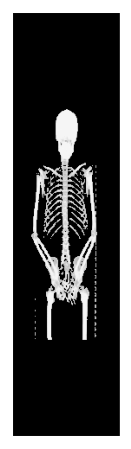

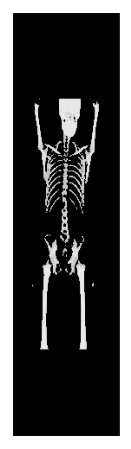

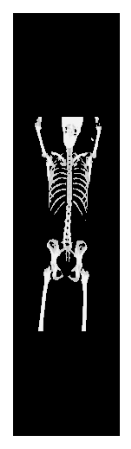

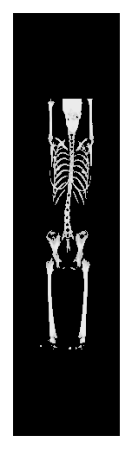

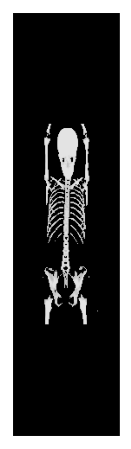

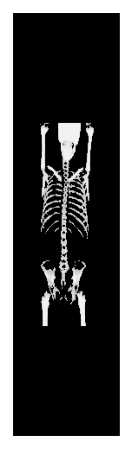

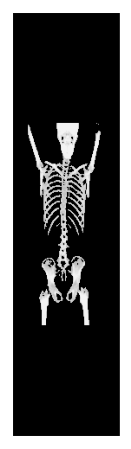

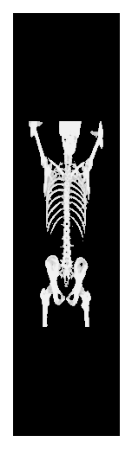

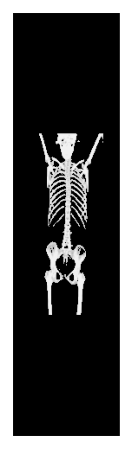

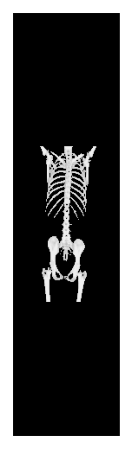

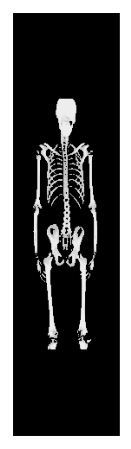

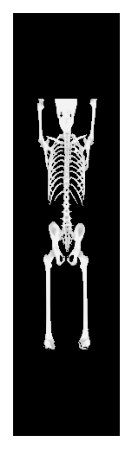

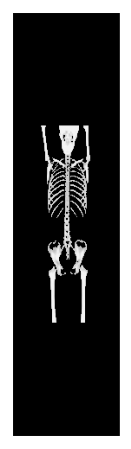

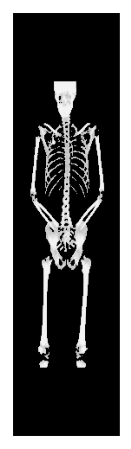

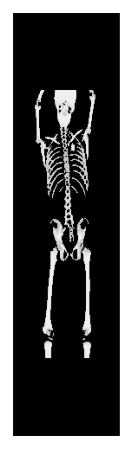

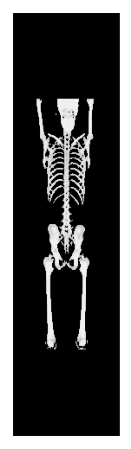

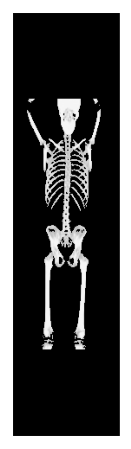

In [181]:
for i in range(0, 100):
    image_path = png_dir[i]
    img = Image.open(image_path).convert('LA')
    array = np.array(img)
    array[np.where(array < 185)] = 0
    array = array[:,:,0]/255 #normalisation entre 0 et 1 
    f = plt.figure(figsize=(5,8))
    axes = plt.gca()
    axes.set_axis_off()
    plt.imshow(array, cmap = 'gray')
    plt.show()
    
    

(503, 136, 2)


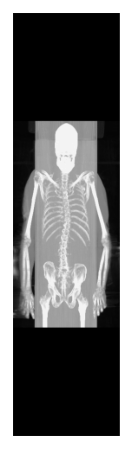

In [182]:
#png 
from PIL import Image 
image_path = '/media/deeplearning/Elements/classif_ct/image_a_annoter/ahl/2.16.840.1.113669.632.20.870421.10000713812_mip_ct.png'
img = Image.open(image_path).convert('LA')
array = np.array(img)
print(array.shape)
f = plt.figure(figsize=(5,8))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(array[:,:,0], cmap = 'gray')
plt.show()

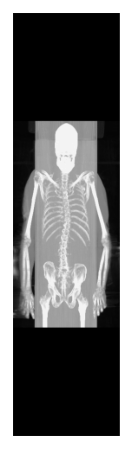

In [187]:
norm = array[:,:,0]/255 
f = plt.figure(figsize=(5,8))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(norm, cmap = 'gray')
plt.show()

In [188]:
norm.shape

(503, 136)

In [184]:
norm.min()

0.0

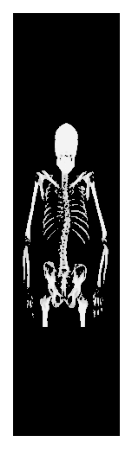

In [185]:
norm[np.where(norm < 0.75)] = 0
f = plt.figure(figsize=(5,8))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(norm, cmap = 'gray')
plt.show()

In [186]:
norm.shape

(503, 136)

In [63]:
X_train[0].mean()

0.20531836117015162

In [3]:
import pandas as pd 


df_train = pd.DataFrame(y_train.tolist())
df_train.columns=['upperLimit', 'lowerLimit', 'rightArm', 'leftArm']

df_val = pd.DataFrame(y_val.tolist())
df_val.columns=['upperLimit', 'lowerLimit', 'rightArm', 'leftArm']

In [4]:
df_train.head(n = 10)

upperLimit  lowerLimit  rightArm  leftArm
0           0           0         1        1
1           1           0         1        1
2           0           0         1        1
3           0           0         1        1
4           0           0         1        1
5           0           0         0        0
6           0           1         1        1
7           0           0         1        1
8           2           0         1        1
9           0           0         0        0

In [5]:
import plotly.graph_objects as go 

def plot_dist(pd_series, types):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values = counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(autosize = False, width = 400, height = 400, title_text=types)
    
    fig.show()

In [6]:
plot_dist(df_train['upperLimit'], 'train')
plot_dist(df_val['upperLimit'], 'val')

In [7]:
plot_dist(df_train['lowerLimit'], 'train')
plot_dist(df_val['lowerLimit'], 'val')

In [8]:
plot_dist(df_train['rightArm'], 'train')
plot_dist(df_val['rightArm'], 'val')

In [9]:
plot_dist(df_train['leftArm'], 'train')
plot_dist(df_val['leftArm'], 'val')